# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL  import Image

# Data Set

In [13]:
data =  h5py.File("dataset/train_catvnoncat.h5", "r")

keys = list(data.keys())
values = list(data.values())

list_classes = np.array(data[keys[0]])
train_set_x = np.array(data[keys[1]])
train_set_y = np.array(data[keys[2]])

print("Keys: ")
for index, key in enumerate(keys):
    print(f"\t{index+1}-{key}")

print("\nValues: ")
for index, value in enumerate(values):
    print(f"\t{index+1}-{value}")

print("\nList Classes: ")
for index, item in enumerate(list_classes):
    print(f"\t{index+1}-{item}")


data_test =  h5py.File("dataset/test_catvnoncat.h5", "r")

keys_test = list(data_test.keys())
values_test = list(data_test.values())

list_classes_test = np.array(data_test[keys_test[0]])
test_set_x = np.array(data_test[keys_test[1]])
test_set_y = np.array(data_test[keys_test[2]])



Keys: 
	1-list_classes
	2-train_set_x
	3-train_set_y

Values: 
	1-<HDF5 dataset "list_classes": shape (2,), type "|S7">
	2-<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
	3-<HDF5 dataset "train_set_y": shape (209,), type "<i8">

List Classes: 
	1-b'non-cat'
	2-b'cat'


# Plot records

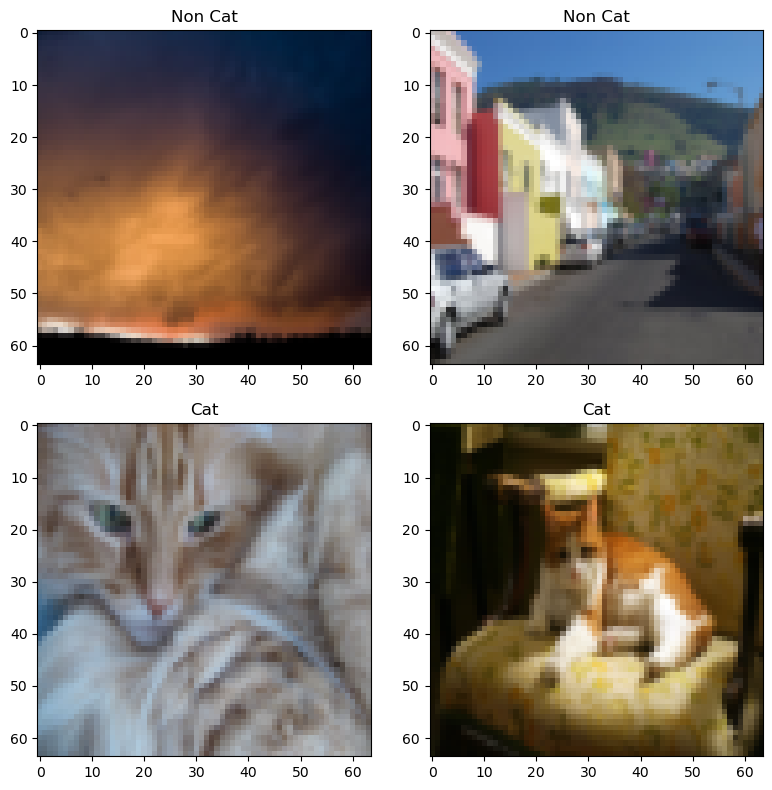

In [14]:
record1_rgb = np.array(train_set_x[0], dtype=np.uint8)
record2_rgb = np.array(train_set_x[1], dtype=np.uint8)
record3_rgb = np.array(train_set_x[2], dtype=np.uint8)
record8_rgb = np.array(train_set_x[7], dtype=np.uint8)


fig, axs = plt.subplots(2, 2, figsize=(8, 8))

title1 = "Cat" if train_set_y[0] else "Non Cat"
axs[0, 0].set_title(title1)
axs[0, 0].imshow(record1_rgb)

title2 = "Cat" if train_set_y[1] else "Non Cat"
axs[0, 1].set_title(title2)
axs[0, 1].imshow(record2_rgb)

title3 = "Cat" if train_set_y[2] else "Non Cat"
axs[1, 0].set_title(title3)
axs[1, 0].imshow(record3_rgb)

title4 = "Cat" if train_set_y[7] else "Non Cat"
axs[1, 1].set_title(title4)
axs[1, 1].imshow(record8_rgb)

plt.tight_layout()
plt.show()


# Flatten Data

In [15]:
train_set_x = train_set_x.reshape(train_set_x.shape[0], 64*64*3)
test_set_x = test_set_x.reshape(test_set_x.shape[0], 64*64*3)

print(train_set_x.shape)
print(test_set_x.shape)

(209, 12288)
(50, 12288)


# Initialize W's & b's

In [16]:
def initialize(columns):
    return np.zeros(columns), 0.0

# Sigmoid

In [17]:
def sigmoid(X, w, b):
    z = np.dot(X, w) + b
    return 1 / (1 + np.exp(-z))

# Loss

In [18]:
def loss(X, y, w, b):
    f = sigmoid(X, w, b)
    return -(y*np.log(f)+(1-y)*np.log(1-f))

# Cost

In [19]:
def cost(X, y, w, b):
    m, _ = X.shape
    return np.sum(loss(X, y, w, b)) / m

# Gradient

In [20]:
def gradient(X, y, w, b):
    m, _ = X.shape
    
    error = sigmoid(X, w, b) - y
    
    d_dw = np.dot(error, X) / m
    d_db = np.sum(error) / m

    return d_dw, d_db    

# Gradient Descent

In [21]:
def gradient_descent(X: np.ndarray, y, w_in, b_in, gradient, J, alpha, iterations):
    history = {}
    w = w_in
    b = b_in

    for i in range(iterations+1):        
        d_dw, d_db = gradient(X, y, w, b)
        w -= alpha * d_dw
        b -= alpha * d_db

        cost = J(X, y, w, b)
        if i % 100 == 0:
            print(f"Iteration: {i}\t|\tcost: {cost}")
        history[i] = cost

    return w, b, history

In [22]:
w_in, b_in = initialize(train_set_x.shape[1])
alpha = 0.00000004
iterations = 1_000

w_final, b_final, history = gradient_descent(train_set_x, train_set_y, w_in, b_in, gradient, cost, alpha, iterations)

print(f"\n\nOptimum Result -->\nw: {w_final}\nb: {b_final}")

Iteration: 0	|	cost: 0.6558117025312479
Iteration: 100	|	cost: 0.5382593187592888
Iteration: 200	|	cost: 0.4838656583918942
Iteration: 300	|	cost: 0.44459806818802255
Iteration: 400	|	cost: 0.41341937618313457
Iteration: 500	|	cost: 0.38751035532833433
Iteration: 600	|	cost: 0.3653751477661783
Iteration: 700	|	cost: 0.3460978749454393
Iteration: 800	|	cost: 0.32906806279301926
Iteration: 900	|	cost: 0.3138550457473624
Iteration: 1000	|	cost: 0.30014223221705644


Optimum Result -->
w: [ 2.03511535e-05 -4.70011762e-05 -2.20961724e-05 ... -2.39618509e-05
 -6.13691764e-05  3.93494817e-05]
b: -2.2514371078184524e-07


# Predict

In [23]:
def is_cat(prob):
    if 0.5 <= prob <= 1:
        return 1
    elif 0 <= prob < 0.5:
        return 0

# Plot Cost

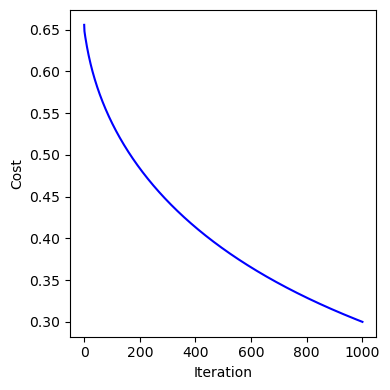

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

axs.set_xlabel("Iteration")
axs.set_ylabel("Cost")
axs.plot(list(history.keys()), list(history.values()), color="blue")

plt.tight_layout()
plt.show()

# Test & Accuracy

In [25]:
def test(X, Y, w, b):    
    sum = 0
    m, n = X.shape
    for i in range(m):
        model_output = is_cat(sigmoid(X[i], w, b))
        actual_output = Y[i]        
        print(f"{X[i]} -> model -> {model_output}\t|\tactual output -> {actual_output}")
        sum += (1 - abs(model_output - actual_output)) * 100        
    return sum/m

test_accuracy = test(test_set_x, test_set_y, w_final, b_final)
print(f"\n\n**********************\n*** Accuracy {round(test_accuracy, 2)}% ***\n**********************")

[158 104  83 ... 173 128 110] -> model -> 1	|	actual output -> 1
[115 110 111 ... 171 176 186] -> model -> 1	|	actual output -> 1
[255 253 254 ... 133 101 121] -> model -> 1	|	actual output -> 1
[254 254 243 ... 129  84  43] -> model -> 1	|	actual output -> 1
[ 96  72  62 ... 146 132 132] -> model -> 1	|	actual output -> 1
[26 53 30 ... 50 73 51] -> model -> 0	|	actual output -> 0
[239 255 255 ... 255 255 255] -> model -> 0	|	actual output -> 1
[236 242 221 ...  28  69 115] -> model -> 1	|	actual output -> 1
[19 24 28 ... 58 61 57] -> model -> 1	|	actual output -> 1
[231 216 218 ... 119 118 113] -> model -> 1	|	actual output -> 1
[36 36 26 ...  5  6  1] -> model -> 0	|	actual output -> 1
[255 255 255 ...  76  47  24] -> model -> 0	|	actual output -> 1
[17 18 12 ...  2  2  0] -> model -> 1	|	actual output -> 1
[234 234 234 ... 226 224 227] -> model -> 1	|	actual output -> 0
[ 92 134  59 ...  41  59   7] -> model -> 0	|	actual output -> 0
[227 234 209 ...  67  55  27] -> model -> 1	|	act

# Real-World Images

In [26]:
img_name0 = "images/2dogs.jpg"
image0 = np.array(Image.open(img_name0, "r").resize((64, 64)))
result0 = image0.reshape((64*64*3))

img_name1 = "images/cat&dog.jpg"
image1 = np.array(Image.open(img_name1, "r").resize((64, 64)))
result1 = image1.reshape((64*64*3))

img_name2 = "images/img.jpg"
image2 = np.array(Image.open(img_name2, "r").resize((64, 64)))
result2 = image2.reshape((64*64*3))

img_name3 = "images/maybe.jpg"
image3 = np.array(Image.open(img_name3, "r").resize((64, 64)))
result3 = image3.reshape((64*64*3))

# Plot Results

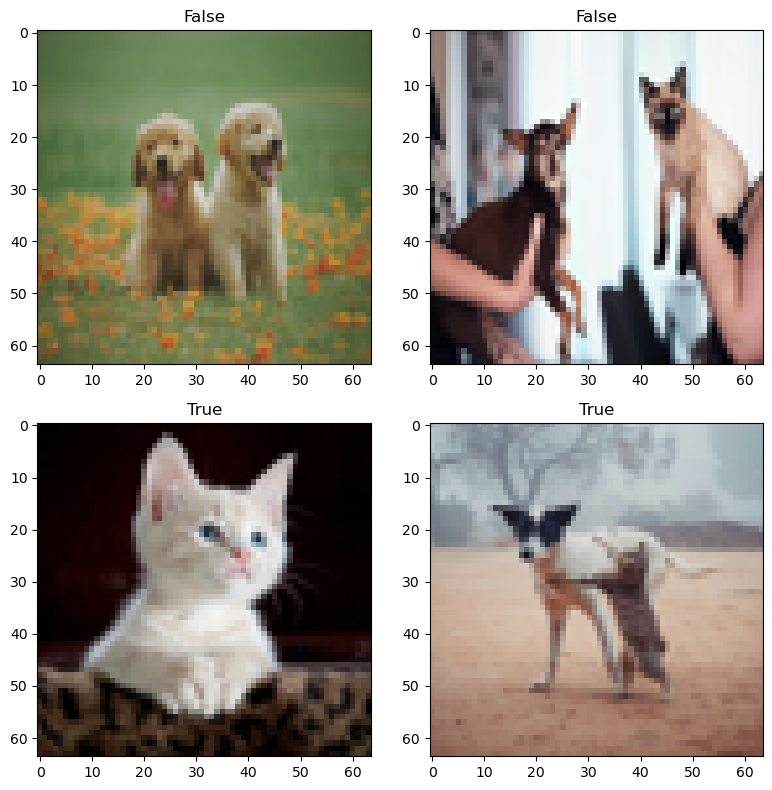

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.flatten()

images = [image0, image1, image2, image3]
results = [result0, result1, result2, result3]
titles = [bool(is_cat(sigmoid(result, w_final, b_final))) for result in results]

for i, ax in enumerate(axs):
    try:
        ax.set_title(titles[i])
        ax.imshow(images[i])
    except Exception as e:
        print(e)
        pass

plt.tight_layout()
plt.show()